<a href="https://colab.research.google.com/github/mubinulislam/ML_basics/blob/main/Linear_Regression/linear_regression_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Cost = 0.14653104991106003, w = 0.04114882153730373, b = 0.05728731228406253
Iteration 100: Cost = 0.007935879825774685, w = 0.5134304010487557, b = 0.2647881178690003
Iteration 200: Cost = 0.003962139982890462, w = 0.6799871211764436, b = 0.1568491614468914
Iteration 300: Cost = 0.002014313423287527, w = 0.7965975584506839, b = 0.08127836004200995
Iteration 400: Cost = 0.0010595382099334461, w = 0.8782394108792272, b = 0.028369372129570757
Iteration 500: Cost = 0.0005915315983893694, w = 0.9353988918293717, b = -0.008673519435383116
Iteration 600: Cost = 0.0003621266186774154, w = 0.975417658740002, b = -0.03460816437253065
Iteration 700: Cost = 0.0002496781117150605, w = 1.0034357876387618, b = -0.05276565099412748
Iteration 800: Cost = 0.0001945587035228781, w = 1.0230519729335414, b = -0.0654781566487248
Iteration 900: Cost = 0.00016754056658599908, w = 1.0367857496218258, b = -0.07437849640312408
Final values: w = 1.0463209331269105, b = -0.08055788716664203


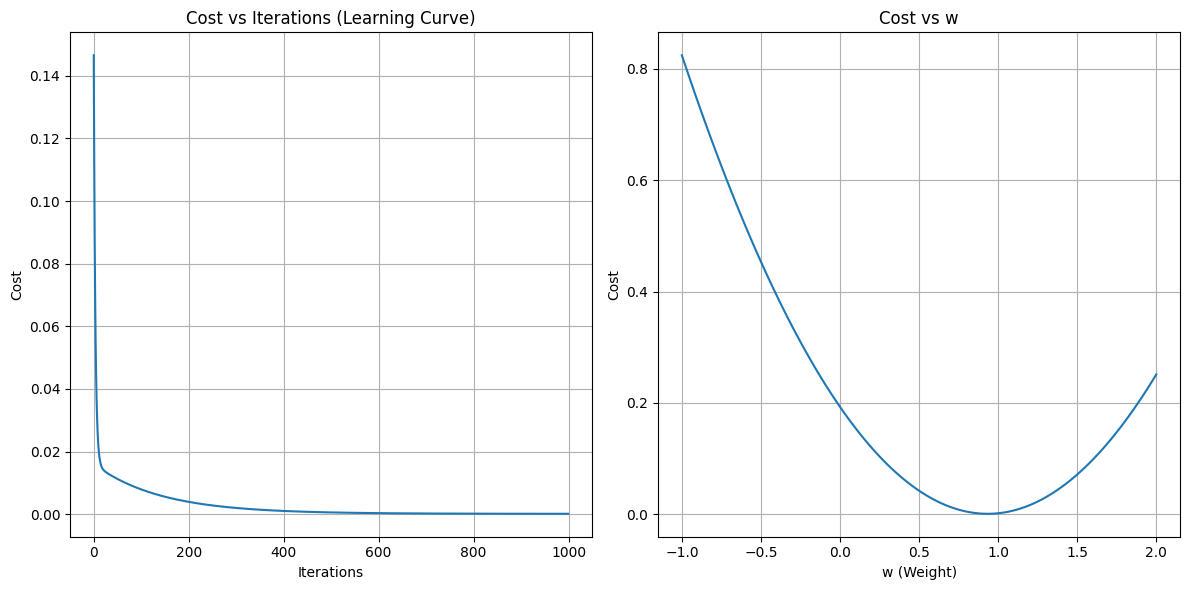

In [37]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150,
     1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750,
     1800, 1850, 1900, 1950, 2000])

Y = np.array([97200, 106800, 114400, 125000, 138500, 147000, 153200, 168100, 177500,
     190300, 203800, 210500, 228400, 236000, 251800, 259000, 275500, 282400,
     300000, 312500, 326000, 342300, 353500, 371000, 383500, 400200, 414500,
     431800, 443000, 458200, 471500])

#Rescaling
x=X/2000
y=Y/471500

#CostFunction
def cost_calculation(x,y,w,b):
    m=len(x)
    f_wb = w * x + b
    total_cost = np.sum((f_wb - y) ** 2) / (2 * m)  # Vectorized cost calculation
    return total_cost

#Dradient_descent
def gradient_descent(x,y,w,b,alpha,iteration):
    j_history=[]
    m=len(x)
    for i in range(iteration):

        #prediction function
        f_wb=w*x+b

        #differentiation of w and b
        d_w=(1/m)*np.sum((f_wb-y)*x)
        d_b=(1/m)*np.sum((f_wb-y))

        #update parameters
        w-=alpha*d_w
        b-=alpha*d_b


        #calculate the cost
        cost = cost_calculation(x,y,w,b)
        j_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}, w = {w}, b = {b}")

    return w,b,j_history

#parameters
w=0
b=0
iteration=1000
alpha=0.1

w_final,b_final,cost_history=gradient_descent(x, y, w, b, alpha, iteration)
print(f"Final values: w = {w_final}, b = {b_final}")

# Cost vs w Plot
w_values = np.linspace(-1, 2, 100)  # Generate 100 points between -1 and 2 for w
cost_values = []
b_fixed = 0  # Keep b constant

# Calculate cost for each value of w
for w in w_values:
    cost = cost_calculation(x, y, w, b_fixed)
    cost_values.append(cost)

# Plotting both graphs as subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 subplot grid

# Subplot 1: Cost vs Iterations (Learning Curve)
axs[0].plot(cost_history)
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Cost')
axs[0].set_title('Cost vs Iterations (Learning Curve)')
axs[0].grid(True)

# Subplot 2: Cost vs w
axs[1].plot(w_values, cost_values)
axs[1].set_xlabel('w (Weight)')
axs[1].set_ylabel('Cost')
axs[1].set_title('Cost vs w')
axs[1].grid(True)

# Display both subplots
plt.tight_layout()
plt.show()

Now using those values the prediction is given below

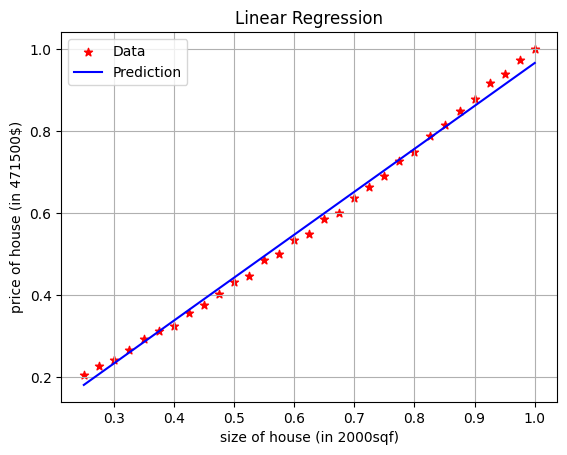

In [40]:
w=1.0463209331269105
b=-0.08055788716664203

f_wb = w * x + b

#linear regression plotting
plt.scatter(x,y,color='red',marker='*')
plt.plot(x,f_wb,color='blue')
plt.legend(['Data','Prediction'])
plt.title("Linear Regression")
plt.xlabel("size of house (in 2000sqf)")
plt.ylabel("price of house (in 471500$)")
plt.grid(True)
plt.show()
